# Cognitive model for Facebook behaviour

Test of the function run_message_sequence at model.py

Authors: Eric Araujo and Dave Ebbelaar


In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import json
import numpy as np
import pandas as pd
from pprint import pprint

import lib.messages.generate_messages as gm
import lib.model.model as model

# Reload libraries automatically
%load_ext autoreload
%autoreload 2

# Plot in the notebook
%matplotlib inline

In [2]:
import numpy as np
import networkx as nx
import math
import matplotlib.pyplot as plt
from pprint import pprint

import lib.model.model

In [3]:
# Get messages
messages = gm.sequence_messages(root_folder="../")
message = dict(messages.iloc[0])
last_message = dict(messages.iloc[-1])

In [4]:
# Get graph
g, w = model.generate_graph(root_folder="../")

In [5]:
# Get agents traits
agent='1'
agents = model.get_agents(root_folder="../") 
# Agents
try:
    agent_traits = agents[agent]
except:
    print("Problems retrieving the traits of agent {} in the JSON.".format(agent))
    pprint(agents, indent=3)
    sys.exit(666)

In [6]:
agent_traits

{'nf_ko': 0.1,
 'nf_ent': 0.1,
 'nf_is': 0.9,
 'nf_si': 0.9,
 'nf_se': 0.9,
 'pt_cons': 0.1,
 'mood': 0.5}

In [7]:
g1, w, traits, parameters, psd = model.run_message(
                                                    message=message, 
                                                    traits=agent_traits, 
                                                    previous_status_dict=None, 
                                                    alogistic_parameters=None, 
                                                    speed_factor=0.5, 
                                                    delta_t=1, timesteps=20, 
                                                    weightList=None, 
                                                    root_folder="../"
                                                )

In [8]:
g1.nodes['mood']

{'pos': 'inner',
 'func': 'alogistic',
 'status': {0: 0.5,
  1.0: 0.49589666974415325,
  2.0: 0.491847407262097,
  3.0: 0.48784390507039077,
  4.0: 0.483880485086092,
  5.0: 0.47995366093461206,
  6.0: 0.4760623345135316,
  7.0: 0.47220783037392167,
  8.0: 0.4683931228693989,
  9.0: 0.46462134486954804,
  10.0: 0.46089429525059905,
  11.0: 0.45721172810133337,
  12.0: 0.4535716101857068,
  13.0: 0.44997091421946567,
  14.0: 0.44640641490587035,
  15.0: 0.4428752093329179,
  16.0: 0.43937493932419497,
  17.0: 0.4359038101146213,
  18.0: 0.4324605088658536,
  19.0: 0.4290440939005538}}

In [9]:
traits

{'nf_ko': 0.1,
 'nf_ent': 0.1,
 'nf_is': 0.9,
 'nf_si': 0.9,
 'nf_se': 0.9,
 'pt_cons': 0.1,
 'mood': 0.4290440939005538}

In [10]:
last_message

{'cat_con': 0.0,
 'cat_edu': 0.0,
 'cat_ent': 1.0,
 'cat_new': 0.0,
 'cat_per': 0.0,
 'msg_com': 0.0,
 'msg_med': 1.0,
 'msg_qua': 0.5,
 'msg_que': 0.0,
 'msg_rel': 1.0,
 'msg_sal': 0.5,
 'msg_sen': 1.0}

In [11]:
g2, w, s, parameters, psd = model.run_message(message=last_message, 
                                              traits=traits, 
                                              previous_status_dict=psd,
                                              alogistic_parameters=parameters, 
                                              speed_factor=0.5, 
                                              delta_t = 1, timesteps = 30, 
                                              weightList=w,
                                              root_folder="../"
                                             )

In [12]:
g2.nodes['mood']

{'pos': 'inner',
 'func': 'alogistic',
 'status': {0: 0.4290440939005538,
  1.0: 0.4256538911271519,
  2.0: 0.42228941103359285,
  3.0: 0.4189502876067482,
  4.0: 0.41563623571195524,
  5.0: 0.4123272502761556,
  6.0: 0.4090230872909452,
  7.0: 0.4057329875131664,
  8.0: 0.4024661592060596,
  9.0: 0.39922888380119637,
  10.0: 0.3960242219430866,
  11.0: 0.3928526926475909,
  12.0: 0.3897132489157841,
  13.0: 0.3866041517714271,
  14.0: 0.3835235643110135,
  15.0: 0.3804698626144349,
  16.0: 0.3774417435377229,
  17.0: 0.37443821857867066,
  18.0: 0.37145855944985623,
  19.0: 0.36850223332958654,
  20.0: 0.36556884531795303,
  21.0: 0.3626580936593864,
  22.0: 0.35976973752426916,
  23.0: 0.35690357500454534,
  24.0: 0.35405942863391204,
  25.0: 0.35123713612012286,
  26.0: 0.3484365445383871,
  27.0: 0.345657506753831,
  28.0: 0.34289987924691867,
  29.0: 0.3401635208064334}}

In [13]:
for m in messages:
    print(m)

cat_con
cat_edu
cat_ent
cat_new
cat_per
msg_com
msg_med
msg_qua
msg_que
msg_rel
msg_sal
msg_sen


In [14]:
for m in dict(messages.T).items():
    print(m[1])

cat_con    0.0
cat_edu    0.0
cat_ent    0.0
cat_new    1.0
cat_per    0.0
msg_com    0.0
msg_med    0.5
msg_qua    0.5
msg_que    0.0
msg_rel    1.0
msg_sal    1.0
msg_sen    1.0
Name: 0, dtype: float64
cat_con    0.0
cat_edu    0.0
cat_ent    0.0
cat_new    1.0
cat_per    0.0
msg_com    0.0
msg_med    0.5
msg_qua    0.5
msg_que    0.0
msg_rel    1.0
msg_sal    1.0
msg_sen    1.0
Name: 1, dtype: float64
cat_con    0.0
cat_edu    0.0
cat_ent    0.0
cat_new    1.0
cat_per    0.0
msg_com    0.0
msg_med    0.5
msg_qua    0.5
msg_que    0.0
msg_rel    1.0
msg_sal    1.0
msg_sen    1.0
Name: 2, dtype: float64
cat_con    0.0
cat_edu    0.0
cat_ent    0.0
cat_new    1.0
cat_per    0.0
msg_com    0.0
msg_med    0.5
msg_qua    0.5
msg_que    0.0
msg_rel    1.0
msg_sal    1.0
msg_sen    1.0
Name: 3, dtype: float64
cat_con    0.0
cat_edu    0.0
cat_ent    0.0
cat_new    1.0
cat_per    0.0
msg_com    0.0
msg_med    0.5
msg_qua    0.5
msg_que    0.0
msg_rel    1.0
msg_sal    1.0
msg_sen    1.0
Name

In [15]:
print(list(messages.iloc[40]), "\n\n", messages.iloc[40])

[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.5, 0.0, 1.0, 0.5, 1.0] 

 cat_con    0.0
cat_edu    0.0
cat_ent    1.0
cat_new    0.0
cat_per    0.0
msg_com    0.0
msg_med    1.0
msg_qua    0.5
msg_que    0.0
msg_rel    1.0
msg_sal    0.5
msg_sen    1.0
Name: 40, dtype: float64


In [16]:
inputsDF, parameters = model.run_message_sequence(message_seq=messages, traits=traits, alogistic_parameters=None,
                          root_folder='../')

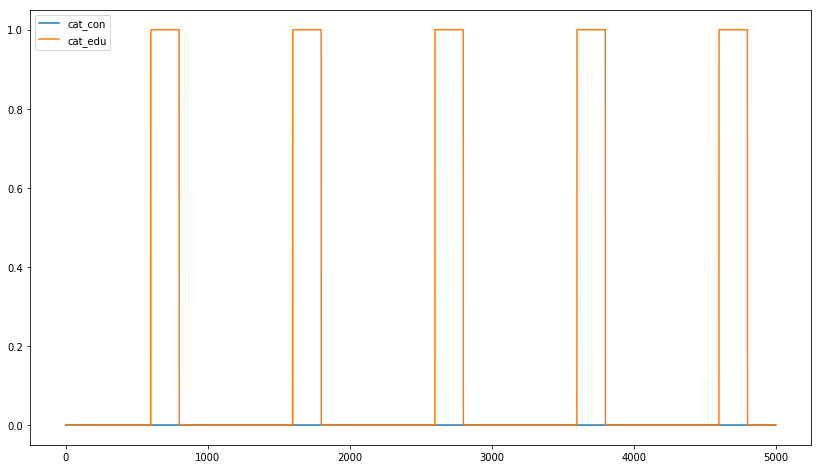

In [17]:
inputsDF[['cat_con', 'cat_edu']].plot(figsize=((14,8)))

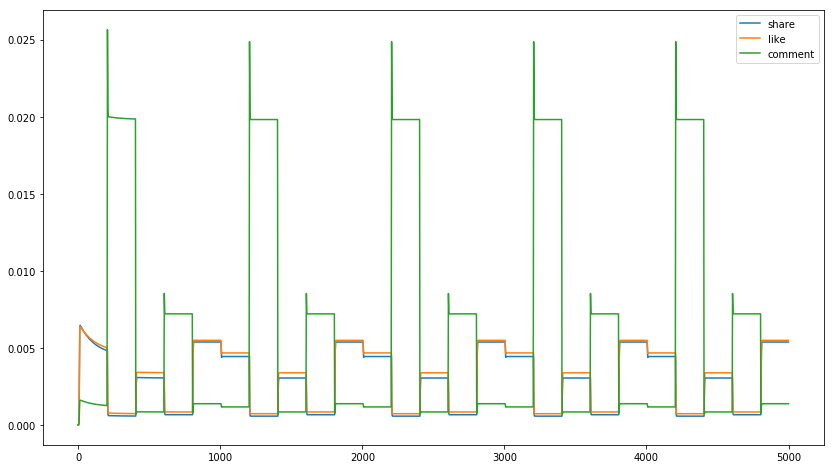

In [18]:
inputsDF[['share', 'like', 'comment']].plot(figsize=((14,8)))